# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.2 Introduction<a id='3.2_Introduction'></a>

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
#!pip3 install -U scikit-learn scipy matplotlib
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

from library.sb_utils import save_file

## 3.4 Load The Data<a id='3.4_Load_The_Data'></a>

### 3.4.1 Ski data<a id='3.4.1_Ski_data'></a>

In [2]:
ski_data = pd.read_csv('./data/ski_data_cleaned.csv')

/Users/johnbaselj/Documents/Coding/GitHub/DataScienceGuidedCapstone/Notebooks


'import os\ncwd = os.getcwd()  # Get the current working directory (cwd)\nfiles = os.listdir(cwd)  # Get all the files in that directory\nprint("Files in %r: %s" % (cwd, files))'

In [3]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         277 non-null    int64  
 1   Name               277 non-null    object 
 2   Region             277 non-null    object 
 3   state              277 non-null    object 
 4   summit_elev        277 non-null    int64  
 5   vertical_drop      277 non-null    int64  
 6   base_elev          277 non-null    int64  
 7   trams              277 non-null    int64  
 8   fastSixes          277 non-null    int64  
 9   fastQuads          277 non-null    int64  
 10  quad               277 non-null    int64  
 11  triple             277 non-null    int64  
 12  double             277 non-null    int64  
 13  surface            277 non-null    int64  
 14  total_chairs       277 non-null    int64  
 15  Runs               274 non-null    float64
 16  TerrainParks       233 non

In [4]:
ski_data.head()

,Unnamed: 0,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,...,TerrainParks,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,...,2.0,1.0,1610.0,113.0,150.0,60.0,669.0,85.0,150.0,550.0
1,1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,...,1.0,2.0,640.0,60.0,45.0,44.0,350.0,53.0,90.0,NaN
2,2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,...,1.0,1.0,30.0,30.0,150.0,36.0,69.0,34.0,152.0,30.0
3,3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,...,4.0,2.0,777.0,104.0,122.0,81.0,260.0,89.0,122.0,NaN
4,4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,...,2.0,1.2,800.0,80.0,115.0,49.0,250.0,78.0,104.0,80.0


### 3.4.2 State-wide summary data<a id='3.4.2_State-wide_summary_data'></a>

In [6]:
state_summary = pd.read_csv('./data/state_summary.csv')

In [7]:
state_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   35 non-null     int64  
 1   state                        35 non-null     object 
 2   resorts_per_state            35 non-null     int64  
 3   state_total_skiable_area_ac  35 non-null     float64
 4   state_total_days_open        35 non-null     float64
 5   state_total_terrain_parks    35 non-null     float64
 6   state_total_nightskiing_ag   35 non-null     float64
 7   state_population             35 non-null     int64  
 8   state_area_sq_miles          35 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 2.6+ KB


In [8]:
state_summary.head()

,Unnamed: 0,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ag,state_population,state_area_sq_miles
0,0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


## 3.5 Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Top States By Order Of Each Of The Summary Statistics<a id='3.5.1_Top_States_By_Order_Of_Each_Of_The_Summary_Statistics'></a>

What does the state-wide picture for the market look like?

In [9]:
state_summary_newind = state_summary.set_index('state')

#### 3.5.1.1 Total state area<a id='3.5.1.1_Total_state_area'></a>

In [10]:
state_summary_newind.state_area_sq_miles.sort_values(ascending=False).head()

state
Alaska        665384
California    163695
Montana       147040
New Mexico    121590
Arizona       113990
Name: state_area_sq_miles, dtype: int64

Montana comes in at third largest.

#### 3.5.1.2 Total state population<a id='3.5.1.2_Total_state_population'></a>

In [11]:
state_summary_newind.state_population.sort_values(ascending=False).head()

state
California      39512223
New York        19453561
Pennsylvania    12801989
Illinois        12671821
Ohio            11689100
Name: state_population, dtype: int64

California dominates the state population figures despite coming in second behind Alaska in size (by a long way). The resort's state of Montana was in the top five for size, but doesn't figure in the most populous states.

#### 3.5.1.3 Resorts per state<a id='3.5.1.3_Resorts_per_state'></a>

In [12]:
state_summary_newind.resorts_per_state.sort_values(ascending=False).head()

state
New York        33
Michigan        28
Colorado        22
California      21
Pennsylvania    19
Name: resorts_per_state, dtype: int64

New York comes top in the number of resorts in our market. Is this because of its proximity to wealthy New Yorkers wanting a convenient skiing trip? Or is it simply that its northerly location means there are plenty of good locations for resorts in that state?

#### 3.5.1.4 Total skiable area<a id='3.5.1.4_Total_skiable_area'></a>

In [13]:
state_summary_newind.state_total_skiable_area_ac.sort_values(ascending=False).head()

state
Colorado      43682.0
Utah          30508.0
California    25948.0
Montana       21410.0
Idaho         16396.0
Name: state_total_skiable_area_ac, dtype: float64

New York state may have the most resorts, but they don't account for the most skiing area. In fact, New York doesn't even make it into the top five of skiable area. Good old Montana makes it into the top five, though. You may start to think that New York has more, smaller resorts, whereas Montana has fewer, larger resorts. Colorado seems to have a name for skiing; it's in the top five for resorts and in top place for total skiable area.

#### 3.5.1.5 Total night skiing area<a id='3.5.1.5_Total_night_skiing_area'></a>

In [15]:
state_summary_newind.state_total_nightskiing_ag.sort_values(ascending=False).head()

state
New York        2836.0
Washington      1997.0
Michigan        1946.0
Pennsylvania    1528.0
Oregon          1127.0
Name: state_total_nightskiing_ag, dtype: float64

#### 3.5.1.6 Total days open<a id='3.5.1.6_Total_days_open'></a>

In [16]:
state_summary_newind.state_total_days_open.sort_values(ascending=False).head()

state
Colorado         3258.0
California       2738.0
Michigan         2389.0
New York         2384.0
New Hampshire    1847.0
Name: state_total_days_open, dtype: float64

### 3.5.2 Resort density<a id='3.5.2_Resort_density'></a>

State-by-state resort metrics compared to population

In [17]:
# The 100_000 scaling is simply based on eyeballing the magnitudes of the data
state_summary['resorts_per_100kcapita'] = 100_000 * state_summary.resorts_per_state / state_summary.state_population
state_summary['resorts_per_100ksq_mile'] = 100_000 * state_summary.resorts_per_state / state_summary.state_area_sq_miles
state_summary.drop(columns=['state_population', 'state_area_sq_miles'], inplace=True)
state_summary.head()

,Unnamed: 0,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ag,resorts_per_100kcapita,resorts_per_100ksq_mile
0,0,Alaska,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
1,1,Arizona,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
2,2,California,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
3,3,Colorado,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
4,4,Connecticut,5,358.0,353.0,10.0,256.0,0.140242,90.203861


With the removal of the two columns that only spoke to state-specific data, we now have a Dataframe that speaks to the skiing competitive landscape of each state. It has the number of resorts per state, total skiable area, and days of skiing.

How do the distributions of these two new features look?

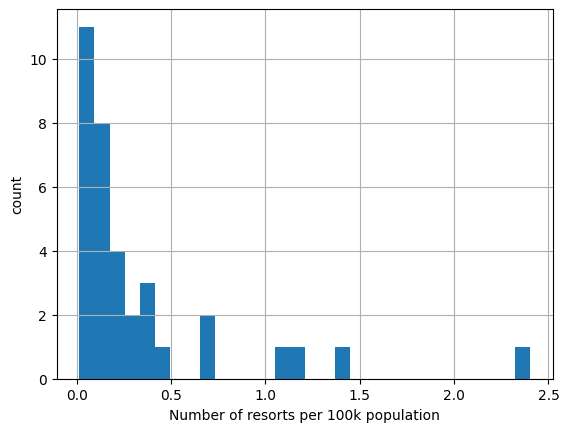

In [18]:
state_summary.resorts_per_100kcapita.hist(bins=30)
plt.xlabel('Number of resorts per 100k population')
plt.ylabel('count');

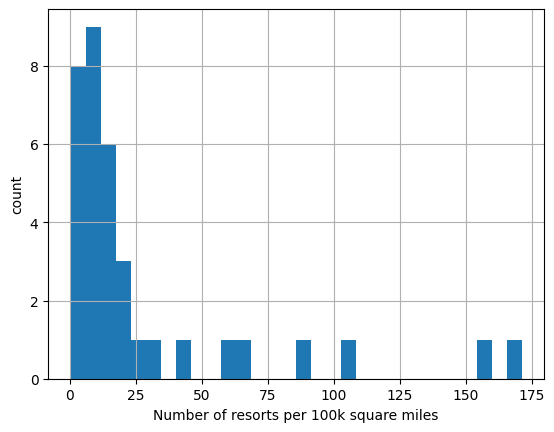

In [19]:
state_summary.resorts_per_100ksq_mile.hist(bins=30)
plt.xlabel('Number of resorts per 100k square miles')
plt.ylabel('count');

So they have quite some long tails on them, but there's definitely some structure there.

#### 3.5.2.1 Top states by resort density<a id='3.5.2.1_Top_states_by_resort_density'></a>

In [20]:
state_summary.set_index('state').resorts_per_100kcapita.sort_values(ascending=False).head()

state
Vermont          2.403889
Wyoming          1.382268
New Hampshire    1.176721
Montana          1.122778
Idaho            0.671492
Name: resorts_per_100kcapita, dtype: float64

In [21]:
state_summary.set_index('state').resorts_per_100ksq_mile.sort_values(ascending=False).head()

state
New Hampshire    171.141299
Vermont          155.990017
Massachusetts    104.225886
Connecticut       90.203861
Rhode Island      64.724919
Name: resorts_per_100ksq_mile, dtype: float64

### 3.5.3 Visualizing High Dimensional Data<a id='3.5.3_Visualizing_High_Dimensional_Data'></a>

Perform principle components analysis (PCA). Find linear combinations of the original features that are uncorrelated with one another and order them by the amount of variance they explain. 

The basic steps in this process are:

1. scale the data
2. fit the PCA transformation 
3. apply the transformation to the data to create the derived features
4. (optionally) use the derived features to look for patterns in the data and explore the coefficients

#### 3.5.3.1 Scale the data<a id='3.5.3.1_Scale_the_data'></a>

You only want numeric data here, although you don't want to lose track of the state labels, so it's convenient to set the state as the index.

In [22]:
#Create a new dataframe, `state_summary_scale` from `state_summary` 
state_summary_scale = state_summary.set_index('state')
#Save the state labels (using the index attribute of `state_summary_scale`)
state_summary_index = state_summary_scale.index
#Save the column names (using the `columns` attribute) of `state_summary_scale`
state_summary_columns = state_summary_scale.columns
state_summary_scale.head()

,Unnamed: 0,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ag,resorts_per_100kcapita,resorts_per_100ksq_mile
state,,,,,,,,
Alaska,0,3,2280.0,345.0,4.0,580.0,0.410091,0.450867
Arizona,1,2,1577.0,237.0,6.0,80.0,0.027477,1.754540
California,2,21,25948.0,2738.0,81.0,587.0,0.053148,12.828736
Colorado,3,22,43682.0,3258.0,74.0,428.0,0.382028,21.134744
Connecticut,4,5,358.0,353.0,10.0,256.0,0.140242,90.203861


In [23]:
state_summary_scale = scale(state_summary_scale)

Construct a dataframe from the ndarray here and reintroduce the column names.

In [24]:
#Create a new dataframe from `state_summary_scale` using the column names we saved in `state_summary_columns`
state_summary_scaled_df = pd.DataFrame(state_summary_scale, columns=state_summary_columns)
state_summary_scaled_df.head()

,Unnamed: 0,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ag,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-1.683251,-0.806912,-0.392012,-0.689059,-0.816118,0.069410,0.139593,-0.689999
1,-1.584236,-0.933558,-0.462424,-0.819038,-0.726994,-0.701326,-0.644706,-0.658125
2,-1.485221,1.472706,1.978574,2.190933,2.615141,0.080201,-0.592085,-0.387368
3,-1.386207,1.599351,3.754811,2.816757,2.303209,-0.164893,0.082069,-0.184291
4,-1.287192,-0.553622,-0.584519,-0.679431,-0.548747,-0.430027,-0.413557,1.504408


#### 3.5.3.2 Calculate the PCA transformation<a id='3.5.3.2_Calculate_the_PCA_transformation'></a>

Fit the PCA transformation using the scaled data.

In [28]:
state_pca = PCA().fit(state_summary_scale)

Plot the cumulative variance ratio with number of components.

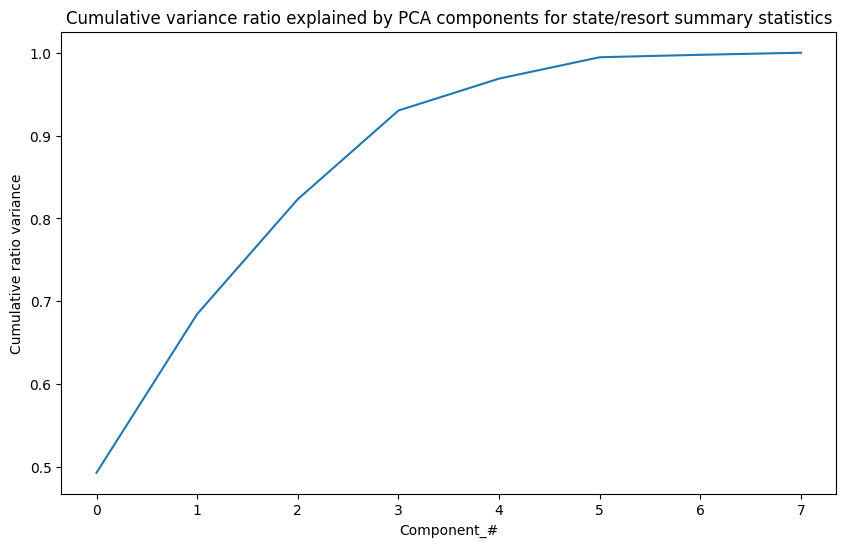

In [29]:
plt.subplots(figsize=(10, 6))
plt.plot(state_pca.explained_variance_ratio_.cumsum())
plt.xlabel('Component_#')
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for state/resort summary statistics');

The first two components seem to account for over 75% of the variance, and the first four for over 95%.

Apply the transformation to the data to obtain the derived features.

In [31]:
#Call `state_pca`'s `transform()` method, passing in `state_summary_scale` as its argument
state_pca_x = state_pca.transform(state_summary_scale)

In [32]:
state_pca_x.shape

(35, 8)

Plot the first two derived features (the first two principle components) and label each point with the name of the state.

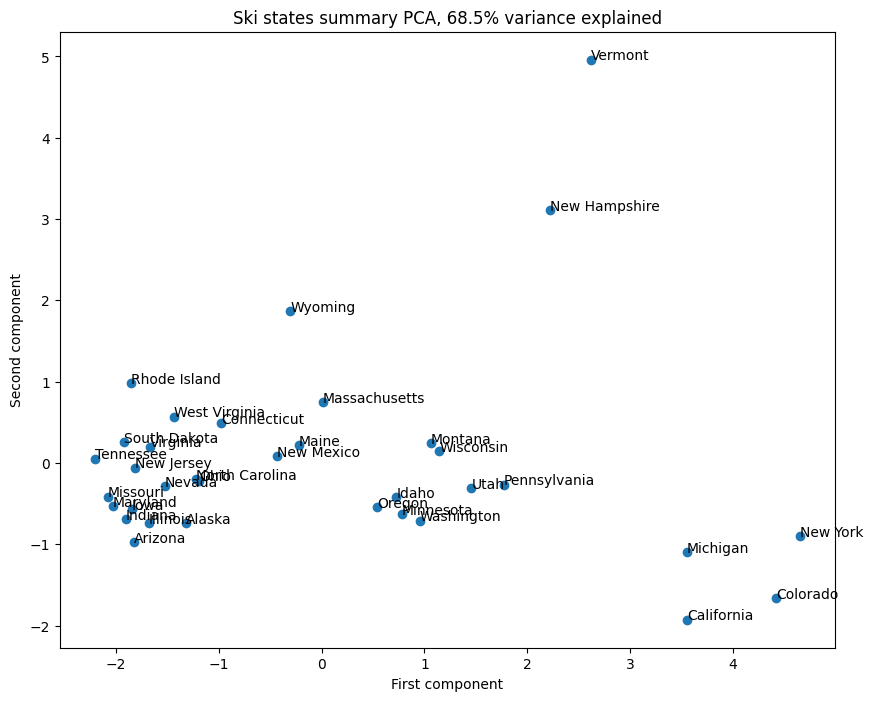

In [33]:
x = state_pca_x[:, 0]
y = state_pca_x[:, 1]
state = state_summary_index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
plt.subplots(figsize=(10,8))
plt.scatter(x=x, y=y)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

#### 3.5.3.3 Average ticket price by state<a id='3.5.3.3_Average_ticket_price_by_state'></a>

In [34]:
#Calculate the average 'AdultWeekend' ticket price by state
state_avg_price = ski_data.groupby('state')['AdultWeekend'].mean()
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

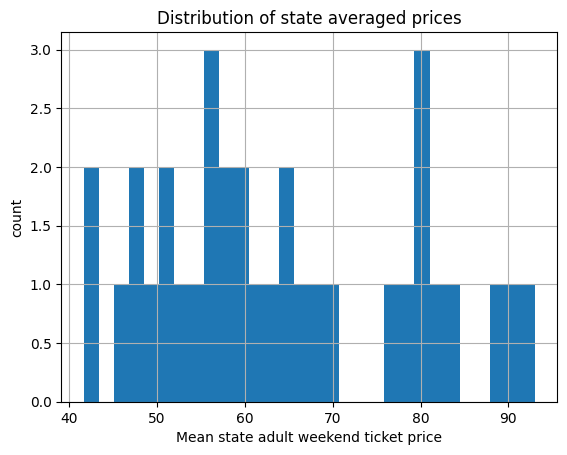

In [35]:
state_avg_price.hist(bins=30)
plt.title('Distribution of state averaged prices')
plt.xlabel('Mean state adult weekend ticket price')
plt.ylabel('count');

#### 3.5.3.4 Adding average ticket price to scatter plot<a id='3.5.3.4_Adding_average_ticket_price_to_scatter_plot'></a>

In [46]:
pca_df = pd.DataFrame({'PC1': state_pca_x[:, 0], 'PC2': state_pca_x[:, 1]}, index=state_summary_index)
pca_df.head()

,PC1,PC2
state,,
Alaska,-1.322093,-0.741996
Arizona,-1.824768,-0.975131
California,3.552710,-1.928407
Colorado,4.416431,-1.660538
Connecticut,-0.977355,0.488490


In [47]:
# our average state prices also have state as an index
state_avg_price.head()

state
Alaska         57.333333
Arizona        83.500000
California     81.416667
Colorado       90.714286
Connecticut    56.800000
Name: AdultWeekend, dtype: float64

In [48]:
# we can also cast it to a dataframe using Series' to_frame() method:
state_avg_price.to_frame().head()

,AdultWeekend
state,
Alaska,57.333333
Arizona,83.500000
California,81.416667
Colorado,90.714286
Connecticut,56.800000


In [49]:
pca_df = pd.concat([pca_df, state_avg_price], axis=1)
pca_df.head()

,PC1,PC2,AdultWeekend
state,,,
Alaska,-1.322093,-0.741996,57.333333
Arizona,-1.824768,-0.975131,83.500000
California,3.552710,-1.928407,81.416667
Colorado,4.416431,-1.660538,90.714286
Connecticut,-0.977355,0.488490,56.800000


In [50]:
pca_df['Quartile'] = pd.qcut(pca_df.AdultWeekend, q=4, precision=1)
pca_df.head()

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Alaska,-1.322093,-0.741996,57.333333,"(53.1, 60.4]"
Arizona,-1.824768,-0.975131,83.500000,"(78.4, 93.0]"
California,3.552710,-1.928407,81.416667,"(78.4, 93.0]"
Colorado,4.416431,-1.660538,90.714286,"(78.4, 93.0]"
Connecticut,-0.977355,0.488490,56.800000,"(53.1, 60.4]"


In [51]:
pca_df.dtypes

PC1              float64
PC2              float64
AdultWeekend     float64
Quartile        category
dtype: object

In [52]:
pca_df[pca_df.isnull().any(axis=1)]

,PC1,PC2,AdultWeekend,Quartile
state,,,,
Rhode Island,-1.850793,0.98041,NaN,NaN


Ah, Rhode Island. How has this happened? Recall you created the original ski resort state summary dataset in the previous step before removing resorts with missing prices. This made sense because you wanted to capture all the other available information. However, Rhode Island only had one resort and its price was missing. You have two choices here. If you're interested in looking for any pattern with price, drop this row. But you are also generally interested in any clusters or trends, then you'd like to see Rhode Island even if the ticket price is unknown. So, replace these missing values to make it easier to handle/display them.

Because `Quartile` is a category type, there's an extra step here. Add the category (the string 'NA') that you're going to use as a replacement.

In [53]:
pca_df['AdultWeekend'].fillna(pca_df.AdultWeekend.mean(), inplace=True)
pca_df['Quartile'] = pca_df['Quartile'].cat.add_categories('NA')
pca_df['Quartile'].fillna('NA', inplace=True)
pca_df.loc['Rhode Island']

PC1             -1.850793
PC2               0.98041
AdultWeekend    64.124388
Quartile               NA
Name: Rhode Island, dtype: object

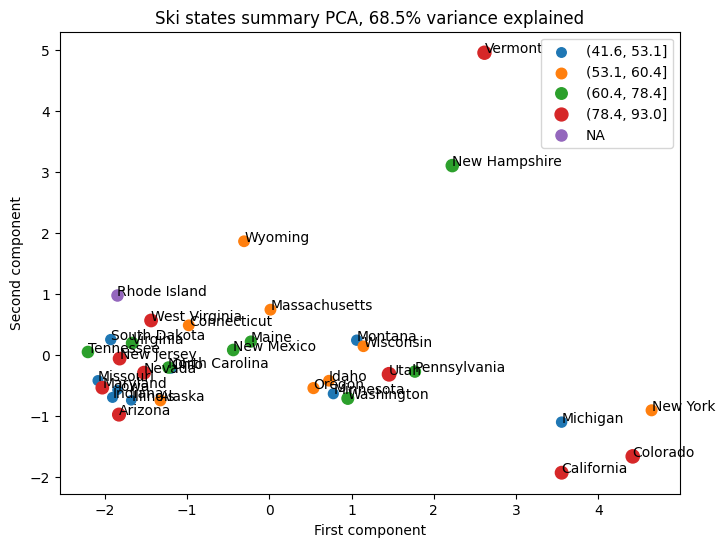

In [76]:
x = pca_df.PC1
y = pca_df.PC2
price = pca_df.AdultWeekend
quartiles = pca_df.Quartile
state = pca_df.index
pc_var = 100 * state_pca.explained_variance_ratio_.cumsum()[1]
fig, ax = plt.subplots(figsize=(8,6))
for q in quartiles.cat.categories:
    im = quartiles == q
    ax.scatter(x=x[im], y=y[im], s=price[im], label=q)
ax.set_xlabel('First component')
ax.set_ylabel('Second component')
plt.legend()
ax.set_title(f'Ski states summary PCA, {pc_var:.1f}% variance explained')
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))

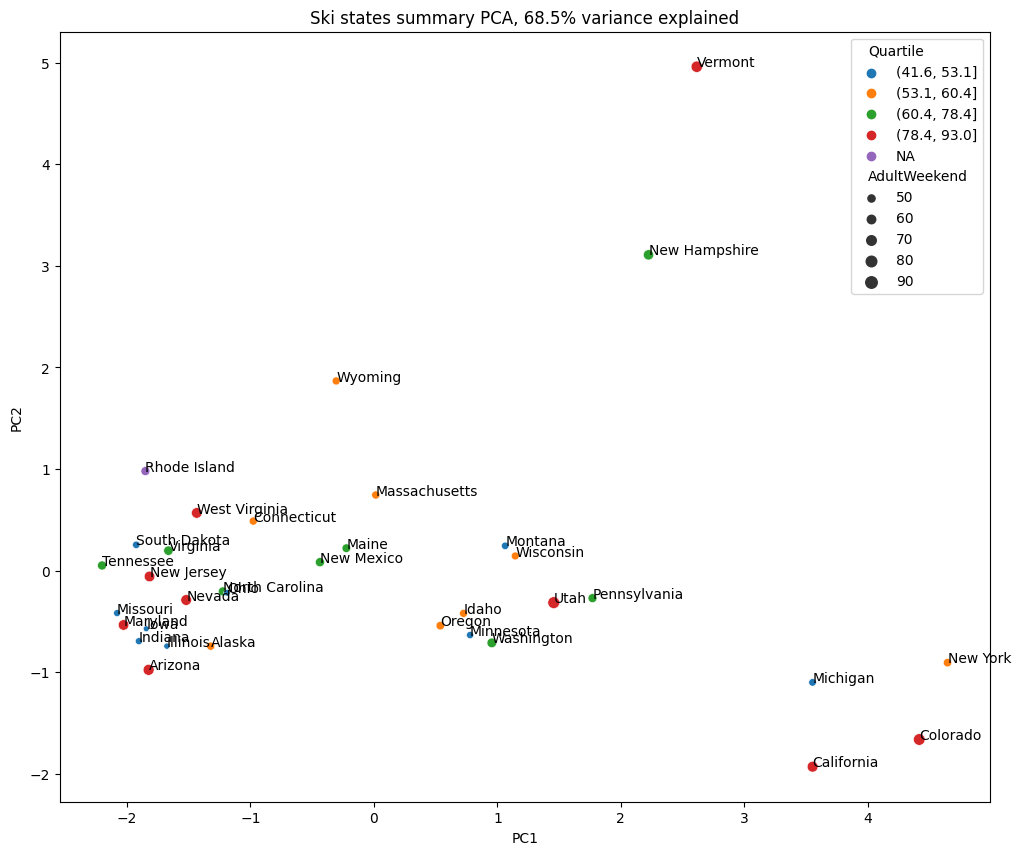

In [56]:
#Create a seaborn scatterplot by calling `sns.scatterplot`
x = pca_df.PC1
y = pca_df.PC2
state = pca_df.index
plt.subplots(figsize=(12, 10))
# Note the argument below to make sure we get the colours in the ascending
# order we intuitively expect!
sns.scatterplot(x=x, y=y, size='AdultWeekend', hue='Quartile', 
                hue_order=pca_df.Quartile.cat.categories, data=pca_df)
#and we can still annotate with the state labels
for s, x, y in zip(state, x, y):
    plt.annotate(s, (x, y))   
plt.title(f'Ski states summary PCA, {pc_var:.1f}% variance explained');

In [57]:
pd.DataFrame(state_pca.components_, columns=state_summary_columns)

,Unnamed: 0,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_nightskiing_ag,resorts_per_100kcapita,resorts_per_100ksq_mile
0,-0.008705,0.486060,0.318595,0.490123,0.488585,0.334114,0.186490,0.191886
1,0.366091,-0.062077,-0.196257,-0.059792,-0.056463,-0.239891,0.634617,0.597125
2,-0.646750,-0.145151,0.423931,0.085044,0.038032,-0.555233,0.248810,0.045377
3,0.595448,-0.117641,0.553879,0.057246,-0.054953,-0.180607,0.210857,-0.491369
4,-0.284883,0.101259,-0.248522,-0.142801,-0.100251,0.347443,0.671654,-0.494516
5,-0.105125,-0.191600,0.535504,-0.281991,-0.401939,0.552323,0.030156,0.344136
6,-0.009556,-0.809837,-0.083259,0.180015,0.488999,0.248009,0.063424,-0.009202
7,-0.027497,-0.148942,-0.134246,0.783184,-0.585581,0.051301,0.008057,-0.007651


For the row associated with the second component, are there any large values?

It looks like `resorts_per_100kcapita` and `resorts_per_100ksq_mile` might count for quite a lot, in a positive sense. Be aware that sign matters; a large negative coefficient multiplying a large negative feature will actually produce a large positive PCA score.

In [58]:
state_summary[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
Unnamed: 0,17,29
state,New Hampshire,Vermont
resorts_per_state,16,15
state_total_skiable_area_ac,3427.0,7239.0
state_total_days_open,1847.0,1777.0
state_total_terrain_parks,43.0,50.0
state_total_nightskiing_ag,376.0,50.0
resorts_per_100kcapita,1.176721,2.403889
resorts_per_100ksq_mile,171.141299,155.990017


In [59]:
state_summary_scaled_df[state_summary.state.isin(['New Hampshire', 'Vermont'])].T

,17,29
Unnamed: 0,0.000000,1.188177
resorts_per_state,0.839478,0.712833
state_total_skiable_area_ac,-0.277128,0.104681
state_total_days_open,1.118608,1.034363
state_total_terrain_parks,0.921793,1.233725
state_total_nightskiing_ag,-0.245050,-0.747570
resorts_per_100kcapita,1.711066,4.226572
resorts_per_100ksq_mile,3.483281,3.112841


So, yes, both states have particularly large values of `resorts_per_100ksq_mile` in absolute terms, and these put them more than 3 standard deviations from the mean. Vermont also has a notably large value for `resorts_per_100kcapita`. New York, then, does not seem to be a stand-out for density of ski resorts either in terms of state size or population count.

### 3.5.4 Conclusion On How To Handle State Label<a id='3.5.4_Conclusion_On_How_To_Handle_State_Label'></a>

Some justification for considering all states equally so not grouping yet, but have captured potentially relevant state data in features most likely to be relevant to business use case

### 3.5.5 Ski Resort Numeric Data<a id='3.5.5_Ski_Resort_Numeric_Data'></a>

In [60]:
ski_data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1


#### 3.5.5.1 Feature engineering<a id='3.5.5.1_Feature_engineering'></a>

In [ ]:
state_summary.head()

In [61]:
ski_data = ski_data.merge(state_summary, how='left', on='state')
ski_data.head().T

,0,1,2,3,4
Unnamed: 0_x,0,1,2,3,4
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort
Region,Alaska,Alaska,Alaska,Arizona,Arizona
state,Alaska,Alaska,Alaska,Arizona,Arizona
summit_elev,3939,2600,2090,11500,11100
vertical_drop,2500,1540,294,2300,1800
base_elev,250,1200,1796,9200,9200
trams,1,0,0,0,0
fastSixes,0,0,0,1,0
fastQuads,2,0,0,0,1


Add "state resort competition" features:

* ratio of resort skiable area to total state skiable area
* ratio of resort days open to total state days open
* ratio of resort terrain park count to total state terrain park count
* ratio of resort night skiing area to total state night skiing area


In [64]:
ski_data['resort_skiable_area_ac_state_ratio'] = ski_data.SkiableTerrain_ac / ski_data.state_total_skiable_area_ac
ski_data['resort_days_open_state_ratio'] = ski_data.daysOpenLastYear / ski_data.state_total_days_open
ski_data['resort_terrain_park_state_ratio'] = ski_data.TerrainParks / ski_data.state_total_terrain_parks
ski_data['resort_night_skiing_state_ratio'] = ski_data.NightSkiing_ac / ski_data.state_total_nightskiing_ag

ski_data.drop(columns=['state_total_skiable_area_ac', 'state_total_days_open', 
                       'state_total_terrain_parks', 'state_total_nightskiing_ag'], inplace=True)

#### 3.5.5.2 Feature correlation heatmap<a id='3.5.5.2_Feature_correlation_heatmap'></a>

A great way to gain a high level view of relationships amongst the features.

In [66]:
ski_data.head()

,Unnamed: 0_x,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastSixes,fastQuads,...,projectedDaysOpen,NightSkiing_ac,Unnamed: 0_y,resorts_per_state,resorts_per_100kcapita,resorts_per_100ksq_mile,resort_skiable_area_ac_state_ratio,resort_days_open_state_ratio,resort_terrain_park_state_ratio,resort_night_skiing_state_ratio
0,0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0,2,...,150.0,550.0,0,3,0.410091,0.450867,0.706140,0.434783,0.500000,0.948276
1,1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0,0,...,90.0,NaN,0,3,0.410091,0.450867,0.280702,0.130435,0.250000,NaN
2,2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0,0,...,152.0,30.0,0,3,0.410091,0.450867,0.013158,0.434783,0.250000,0.051724
3,3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,1,0,...,122.0,NaN,1,2,0.027477,1.754540,0.492708,0.514768,0.666667,NaN
4,4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,0,1,...,104.0,80.0,1,2,0.027477,1.754540,0.507292,0.485232,0.333333,1.000000


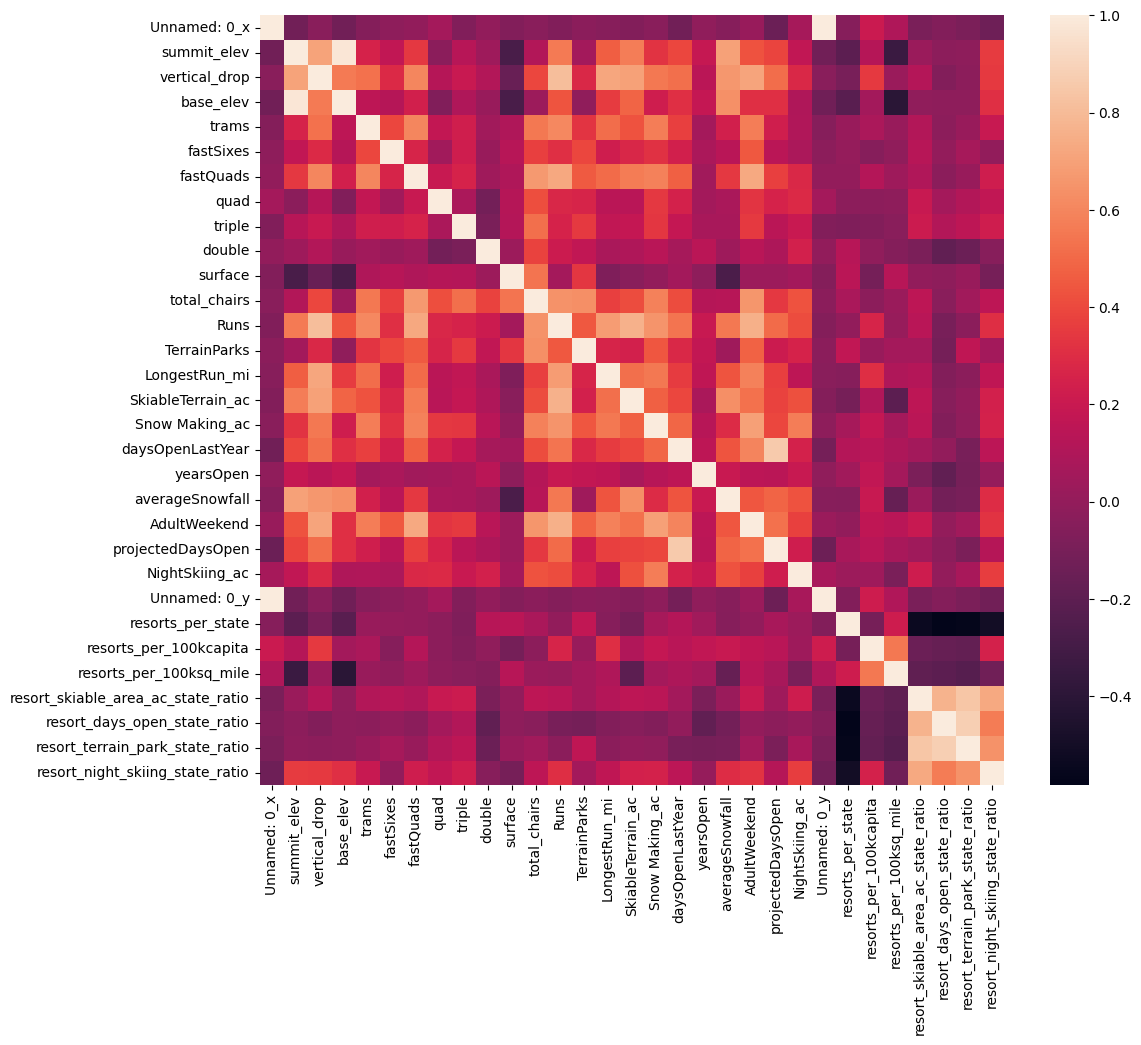

In [67]:
#Show a seaborn heatmap of correlations in ski_data
plt.subplots(figsize=(12,10))
sns.heatmap(ski_data.corr(numeric_only=True));

Attention on target feature, `AdultWeekend` ticket price, you see quite a few reasonable correlations. `fastQuads` stands out, along with `Runs` and `Snow Making_ac`. The last one is interesting. Visitors would seem to value more guaranteed snow, which would cost in terms of snow making equipment, which would drive prices and costs up. Of the new features, `resort_night_skiing_state_ratio` seems the most correlated with ticket price. If this is true, then perhaps seizing a greater share of night skiing capacity is positive for the price a resort can charge.

As well as `Runs`, `total_chairs` is quite well correlated with ticket price. The vertical drop seems to be a selling point that raises ticket prices as well.

#### 3.5.5.3 Scatterplots of numeric features against ticket price<a id='3.5.5.3_Scatterplots_of_numeric_features_against_ticket_price'></a>

In [69]:
# define useful function to create scatterplots of ticket prices against desired columns
def scatterplots(columns, ncol=None, figsize=(15, 8)):
    if ncol is None:
        ncol = len(columns)
    nrow = int(np.ceil(len(columns) / ncol))
    fig, axes = plt.subplots(nrow, ncol, figsize=figsize, squeeze=False)
    fig.subplots_adjust(wspace=0.5, hspace=0.6)
    for i, col in enumerate(columns):
        ax = axes.flatten()[i]
        ax.scatter(x = col, y = 'AdultWeekend', data=ski_data, alpha=0.5)
        ax.set(xlabel=col, ylabel='Ticket price')
    nsubplots = nrow * ncol    
    for empty in range(i+1, nsubplots):
        axes.flatten()[empty].set_visible(False)

In [83]:
features = [col for col in ski_data.columns if col not in ['Name', 'Region', 'state','AdultWeekend']]


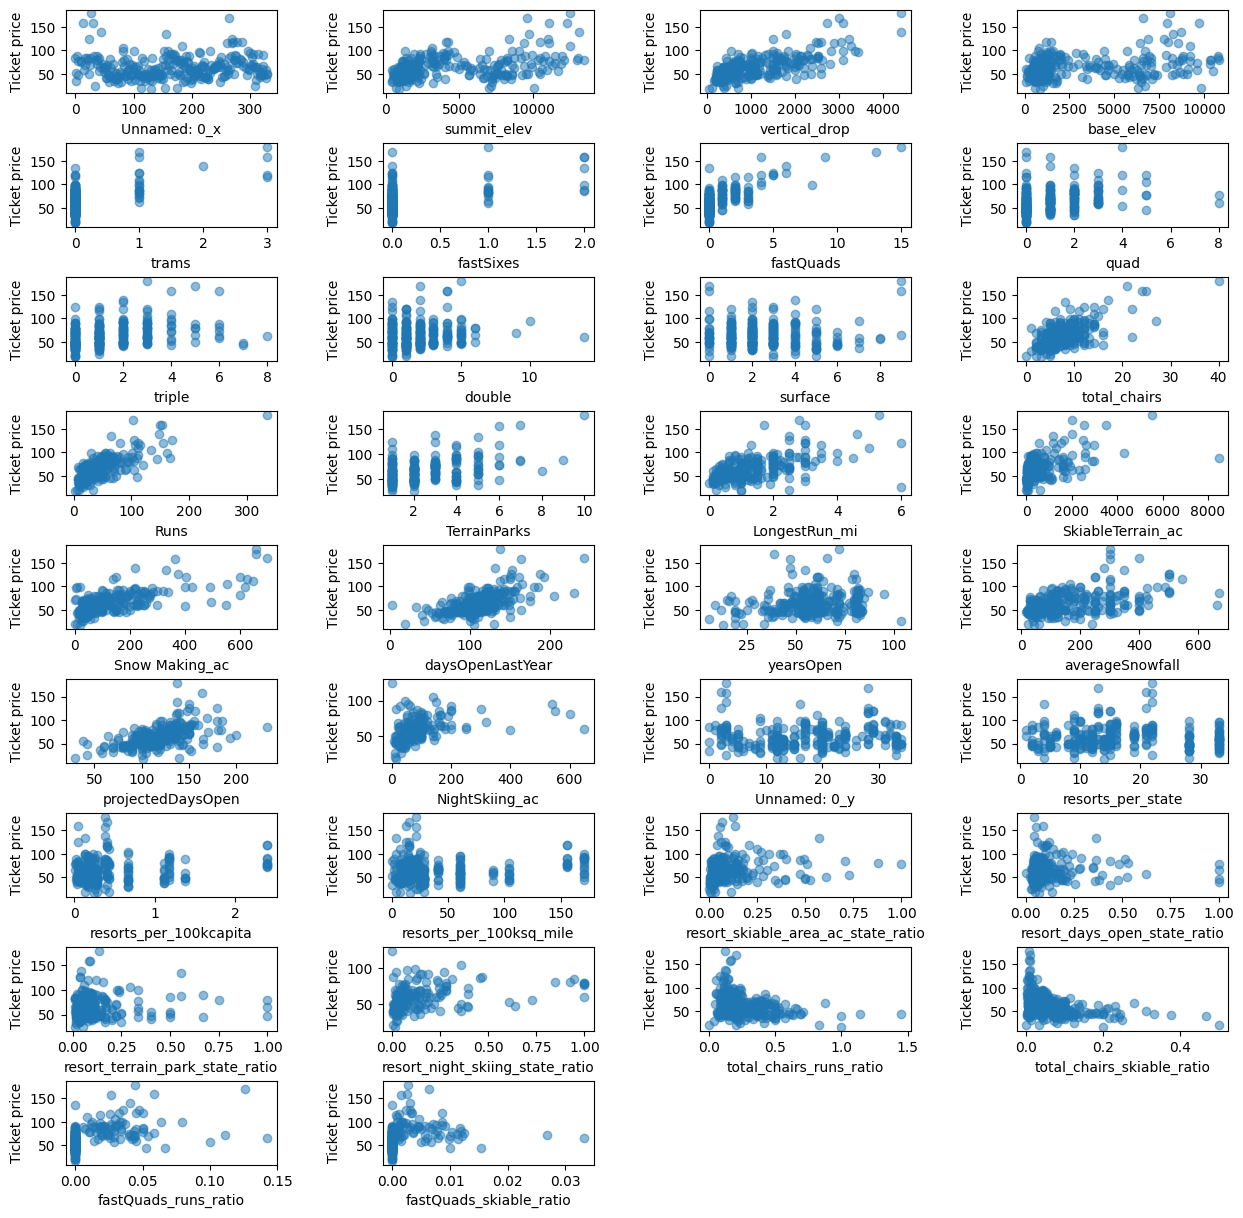

In [84]:
scatterplots(features, ncol=4, figsize=(15, 15))

In [72]:
ski_data['total_chairs_runs_ratio'] = ski_data.total_chairs / ski_data.Runs
ski_data['total_chairs_skiable_ratio'] = ski_data.total_chairs / ski_data.SkiableTerrain_ac
ski_data['fastQuads_runs_ratio'] = ski_data.fastQuads / ski_data.Runs
ski_data['fastQuads_skiable_ratio'] = ski_data.fastQuads / ski_data.SkiableTerrain_ac

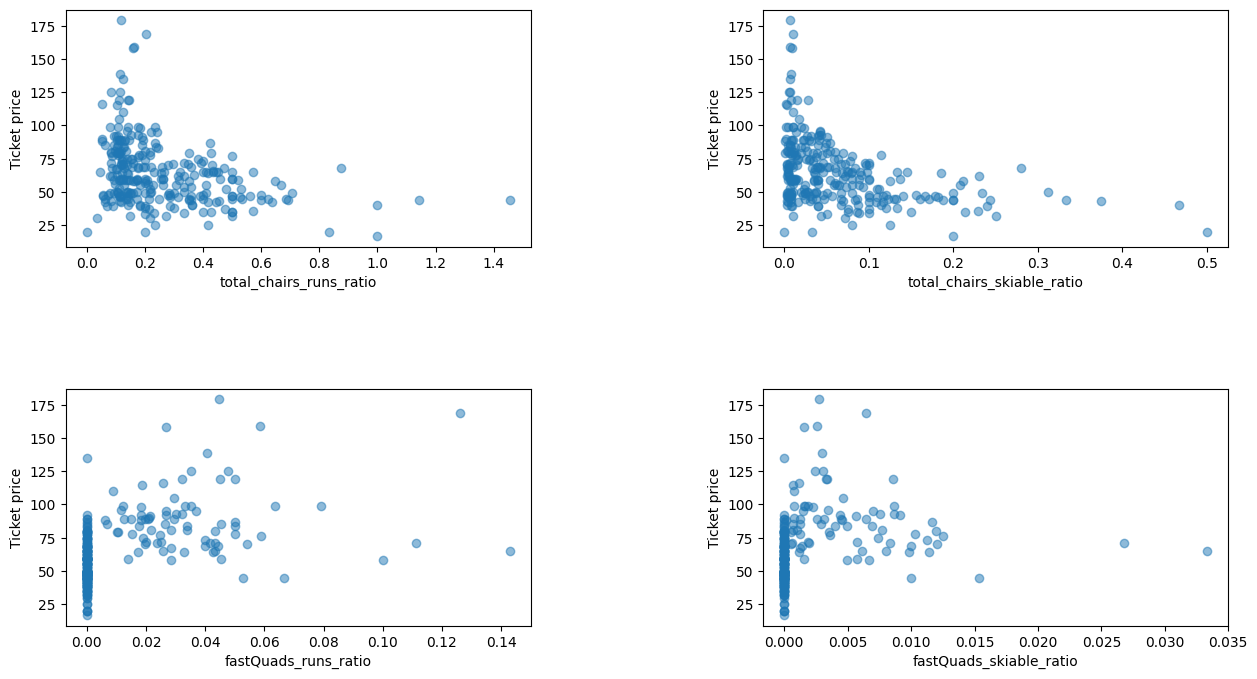

In [73]:
scatterplots(['total_chairs_runs_ratio', 'total_chairs_skiable_ratio', 
              'fastQuads_runs_ratio', 'fastQuads_skiable_ratio'], ncol=2)

## 3.6 Summary<a id='3.6_Summary'></a>

The datasets that were imported from ski_data_cleaned.csv and state_summary.csv  contained mostly numerical data, plus the state and region of each resort entry. The numerical data contained info about geography such as state size and population, resort facilities like number of each lift type and snowaking ability, and size like number of runs and area of skiable terrain.
	There was no strong correlation found between state and average ticket price, so for this iteration of exploratory data analysis the ticket price is assumed to be independent of state factors. 
	Resort prices were found to be most closely correlated with number of runs, number of fast quad lifts, and vertical drop, and were also positively correlated with snowmaking ability, total number of chairs, and days open last season.
	Variables that correlate strongly with one another, like total skiable area and number of lifts, will need to be treated carefully when modeling to avoid bias. Another example of this is a strong correlation between summit elevation and base elevation.


In [75]:
# Save the data 

datapath = './data'
save_file(ski_data, 'ski_data_step3_features.csv', datapath)

Writing file.  "./data/ski_data_step3_features.csv"
